In [9]:
import pydev
import numpy as np
import matplotlib.pyplot as plt

import random

fd=open('/Users/gusimiu/work/nid_info/q_distribution_100713')

rough_q_all=[]
dnn_q_all=[]
clicks_all=[]

for row in pydev.foreach_row(fd):
    rough_q, dnn_q = row[5], row[6]
    if rough_q == 'ann_q':
        continue
    
    click = int(row[2])
    rough_q = float(rough_q)
    dnn_q = float(dnn_q)
    
    rough_q_all.append(rough_q)
    dnn_q_all.append(dnn_q)
    clicks_all.append(click)
    
    


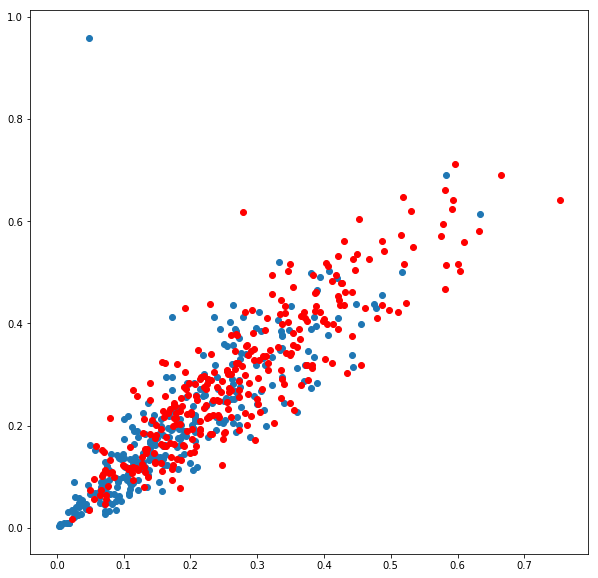

In [32]:
# 横坐标-粗排，纵坐标-精排，红点，点击，蓝点，展现不点击
x0=[]
y0=[]
x1=[]
y1=[]
N=300
for rough_q, dnn_q, click in zip(rough_q_all, dnn_q_all, clicks_all):
    if click == 1:
        x = x1
        y = y1
    else:
        x = x0
        y = y0
    
    if len(x)>=N:
        idx = random.randint(0, N-1)
        x[idx] = rough_q
        y[idx] = dnn_q
    else:
        x.append(rough_q)
        y.append(dnn_q)

plt.figure(figsize=(10,10))
plt.scatter(x0, y0)
plt.scatter(x1, y1, c='r')
plt.show()


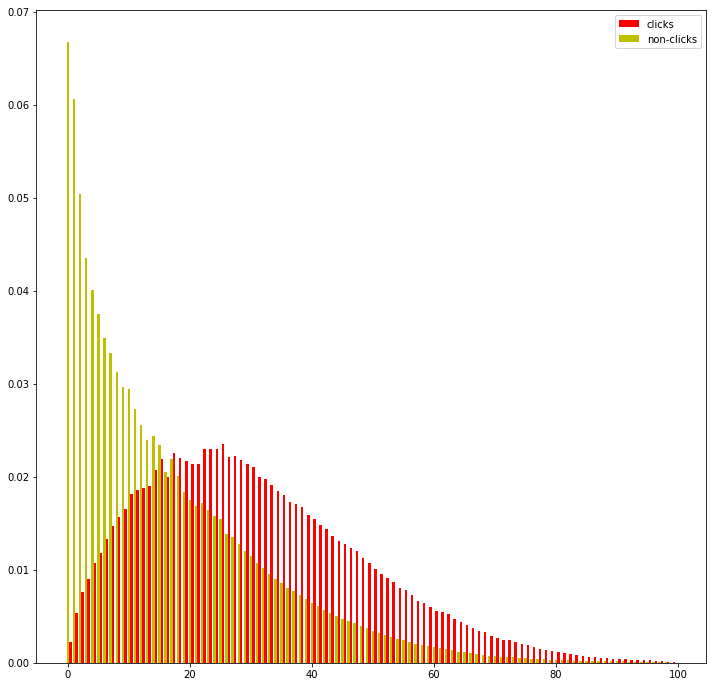

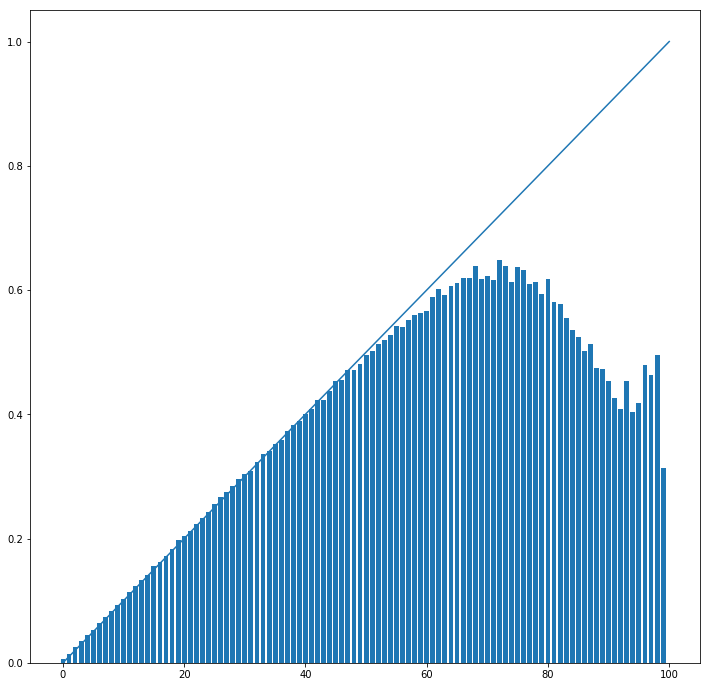

In [50]:
#统计点击情况下的q分布。

def make_distribution(counter):
    acc = sum(counter)
    return map(lambda x:x*1.0/acc, counter)

dnn_clicks = [0] * 100
dnn = [0] * 100
for dnn_q, click in zip(dnn_q_all, clicks_all):
    if click == 1:
        dnn_clicks[ int(dnn_q * 100.0) ] += 1
    dnn[ int(dnn_q * 100.0) ] += 1
        
dnn_dist_clicks = make_distribution(dnn_clicks)
dnn_dist = make_distribution(dnn)
    
width = 0.8
n = 2
barwidth = width/n

plt.figure(figsize=(12,12))
begin_pos_all = list(range(len(dnn_dist_clicks)))
begin_pos_clicks = map(lambda x:x+barwidth, begin_pos_all)
plt.bar(begin_pos_clicks, dnn_dist_clicks, fc='r', width=barwidth, label='clicks')
plt.bar(begin_pos_all, dnn_dist, fc='y', width=barwidth, label='non-clicks')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
ctr_dist = map(lambda x:x[0]*1.0/x[1], zip(dnn_clicks, dnn))
plt.plot([0,100], [0,1])
plt.bar(range(len(ctr_dist)), ctr_dist, label='ctr')
plt.show()



In [13]:
from sklearn.metrics import roc_auc_score

print roc_auc_score(clicks_all, rough_q_all)
print roc_auc_score(clicks_all, dnn_q_all)



0.7735487338891132
0.7883609161749806
0.7881212609326671


In [30]:
base = roc_auc_score(clicks_all, dnn_q_all)
def test_linear(ratio):
    merge_q = map(lambda x:math.log(x[0])+ratio*math.log(x[1]), zip(rough_q_all, dnn_q_all))
    s = roc_auc_score(clicks_all, merge_q)
    print '%f (%+f)' % (s, s-base) 
    
for r in range(10, 60, 3):
    print r
    test_linear(r * .1)
    

10
0.786287 (-0.002074)
13
0.787260 (-0.001101)
16
0.787895 (-0.000466)
19
0.788322 (-0.000039)
22
0.788616 (+0.000255)
25
0.788821 (+0.000460)
28
0.788963 (+0.000603)
31
0.789063 (+0.000702)
34
0.789130 (+0.000769)
37
0.789175 (+0.000814)
40
0.789203 (+0.000843)
43
0.789219 (+0.000858)
46
0.789226 (+0.000865)
49
0.789226 (+0.000865)
52
0.789220 (+0.000859)
55
0.789211 (+0.000850)
58
0.789199 (+0.000838)


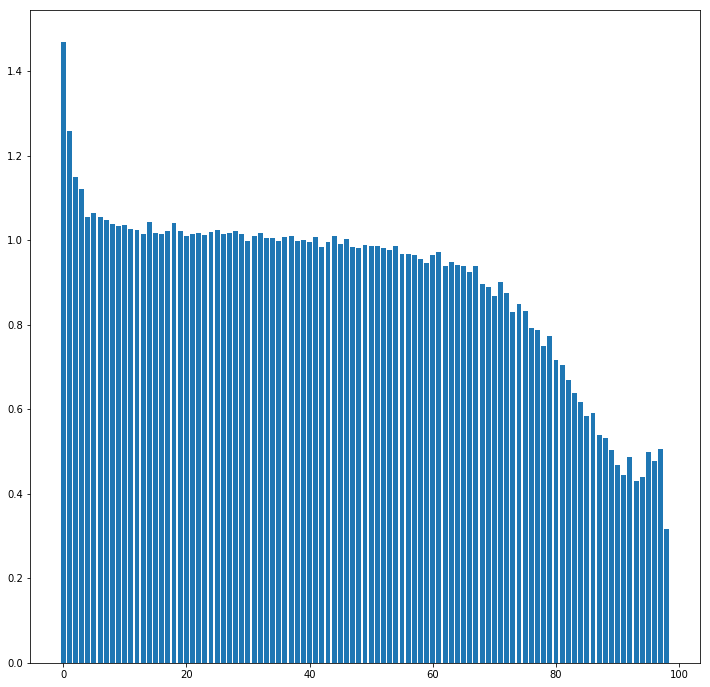

0.7883609161749806
0.7884296573800176


In [61]:
import math

ctr_bias = map(lambda x:x[1]*100./(x[0]+1), list(enumerate(ctr_dist[1:])))

plt.figure(figsize=(12,12))
plt.bar(range(len(ctr_bias)), ctr_bias, label='ctr')
ctr_bias = [1.0] + ctr_bias
plt.show()


def proc(x):
    return x * ctr_bias[int(x * 100.)]
    

merge_q = map(proc, dnn_q_all)

print roc_auc_score(clicks_all, dnn_q_all)
print roc_auc_score(clicks_all, merge_q)


In [60]:
a=[12,23]
a = [0] + a
print a

[0, 12, 23]
